# Amazon Bestsellers Exploratory Data Analysis

There is a saying in Russia that a book is the best gift. Indeed, who doesn't like to read? However, not all the books are created equal. In this notebook we will take a look at the Amazon Bestsellers from 2009 to 2019 and will try to find out how the audience's taste has shifted over the period of 10 years (or maybe it hasn't at all?). Do people like fiction or non-fiction better, are new books more popular than old ones, who is the best-selling author and is his books more expensive than others? We will find answer to all this quesetions in this notebook.
Let's start!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

#setting default figure size
sns.set(rc={"figure.figsize":(12, 6)})
plt.rcParams['figure.figsize'] = (12, 6)

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('amazon_books.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
df[['User Rating', 'Reviews', 'Price']].describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


We have 550 books in the dataset. The average user rating is 4.6, amount of reviews - 11053, price - $13. Interestingly enough, the lowest user rating is 3.3, which is indeed quite low. How did this book even end up in the bestsellers list? And what is this book? Let's find out.

In [6]:
suck = df[df['User Rating'] == 3.3]
suck

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


Really? The famous J.K.Rowling who created You-Know-Who got the worst rating in our dataset. And they ask 12 dollars for that book? SMH.
And which books has the best ratings?

In [7]:
cool = df[df['User Rating'] == 4.9]
cool

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


We can see J.K. Rowling again with her Harry Potter. However, the majority of those highly rated books are all books for children. There are also books about Jesus calling and Obama's intimate portrait, but those are outliers.

Let's see if there any relationships between rating and amount of reviews.

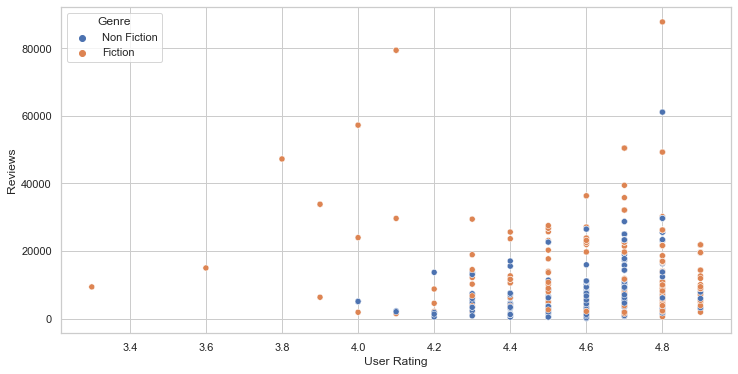

In [8]:
sns.scatterplot(data=df, x='User Rating', y='Reviews', hue='Genre');

We can tell from the scatterplot that the higher the rating, the more reviews a book generaly gets. It is also clear that there are much more books with ratings of 4.2 and above than those below this rating.<br>
Now let's find out what books people love better - fiction or non-fiction.

In [9]:
df[df['Genre'] == 'Fiction']['User Rating'].mean()

4.648333333333326

In [10]:
df[df['Genre'] != 'Fiction']['User Rating'].mean()

4.595161290322579

There is no significant difference between average user rating for fiction and non-fiction books. But did peoples' preferences about the genre changed during 10 years?

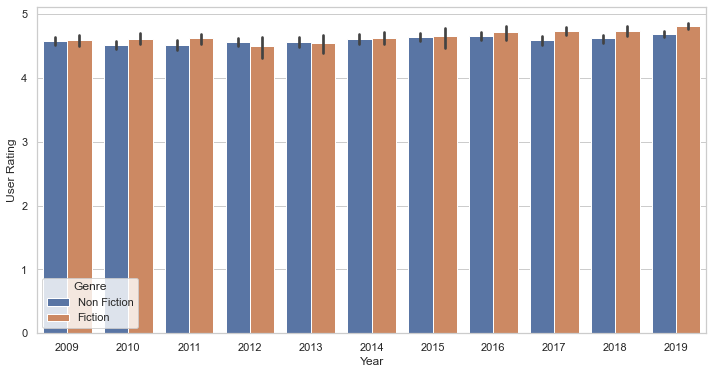

In [11]:
sns.barplot(data=df, x='Year', y='User Rating', hue='Genre');

As we can see, fiction and non fiction books were consistently showing similar results for all 10 years of survey.

Okay, now let's see if people prefer newer books over older ones.

In [12]:
old = df[df['Year'] < 2015]
new = df[df['Year'] >= 2015]
print(old['User Rating'].mean())
print(new['User Rating'].mean())

4.568000000000003
4.6787999999999945


Again, no significant difference between older and newer books' ratings.

Now it's time to find out the top-3 best selling authors. First, let's see if any author wrote a book with the raiting of 5.

In [13]:
df[df['User Rating'] == 5].any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

Nope. What about authors with 4.5 rating?

In [14]:
top_books = df[df['User Rating'] >= 4.5].drop(['Price', 'Year'], axis=1)
top_books.head()

,Name,Author,User Rating,Reviews,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,Non Fiction


Let's find out what rating is the most popular one among top writers.

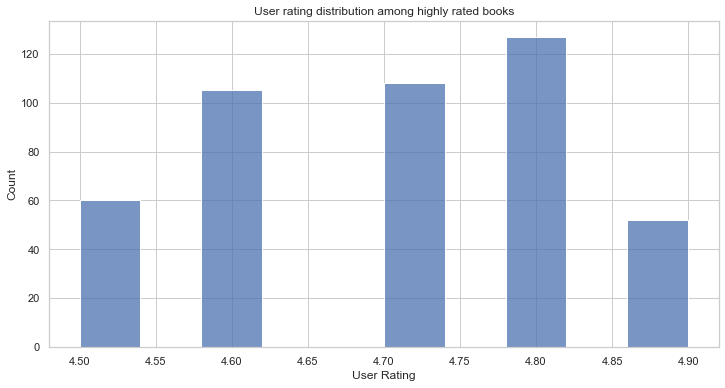

In [15]:
sns.histplot(data=top_books, x='User Rating')
plt.title('User rating distribution among highly rated books')
plt.show()

We can see that among the most highly rated books the rating 4.8 is most often. What about all books in the dataset?

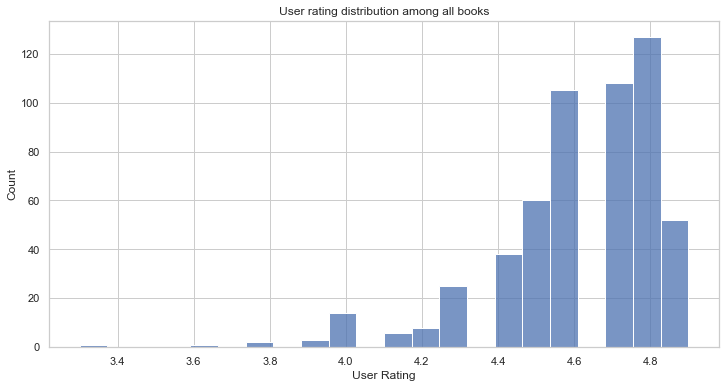

In [16]:
sns.histplot(data=df, x='User Rating')
plt.title('User rating distribution among all books')
plt.show()

Interestingly enough, the most popular rating here is still 4.8. And we can see that amount of positive ratings (those higher than 4.0) is overwelmingly bigger.

Now, who actually is the most best-selling author?

In [17]:
authors = df['Author'].value_counts()
author_names = []
author_counts = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_counts.append(authors[i])

In [18]:
author_names[:5]

['Jeff Kinney',
 'Rick Riordan',
 'Gary Chapman',
 'Suzanne Collins',
 'American Psychological Association']

In [19]:
author_counts[:5]

[12, 11, 11, 11, 10]

In [20]:
top_authors = pd.DataFrame({'Author':author_names, 'Count':author_counts})
top_authors

,Author,Count
0,Jeff Kinney,12
1,Rick Riordan,11
2,Gary Chapman,11
3,Suzanne Collins,11
4,American Psychological Association,10
...,...,...
243,Coloring Books for Adults,1
244,Randy Pausch,1
245,Ken Follett,1
246,Marty Noble,1


In [21]:
top_authors = top_authors[:10]

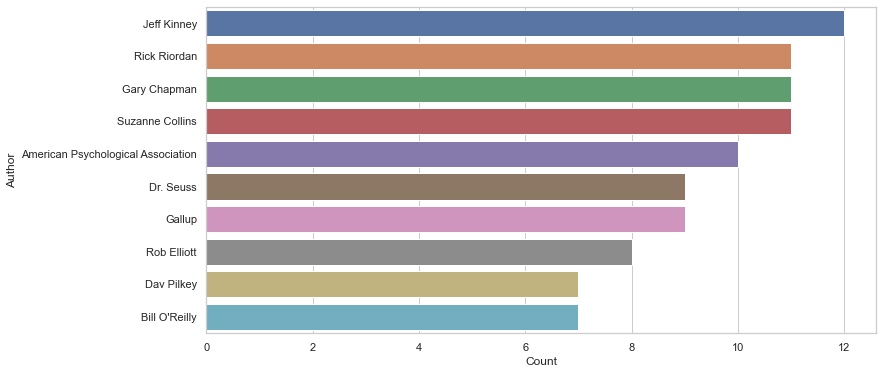

In [22]:
sns.barplot(data=top_authors, x='Count', y='Author');

As we can see, Jeff Kinney is the leader - his books appeared in the TOP list 12 times. Next after him are Gary Chapman, Suzanne Collins and Rick Riordan (11 times each).

We will now take a look at the price distribution of all books and then find out if there is any correlation between a book's price and its rating.

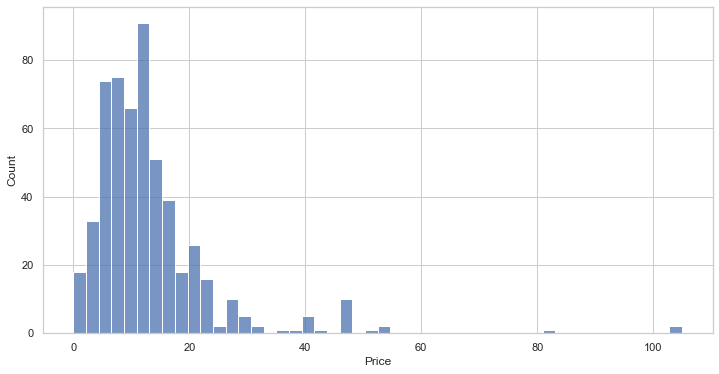

In [23]:
sns.histplot(data=df, x='Price');

Most of the books are cheaper than 20 dollars. 

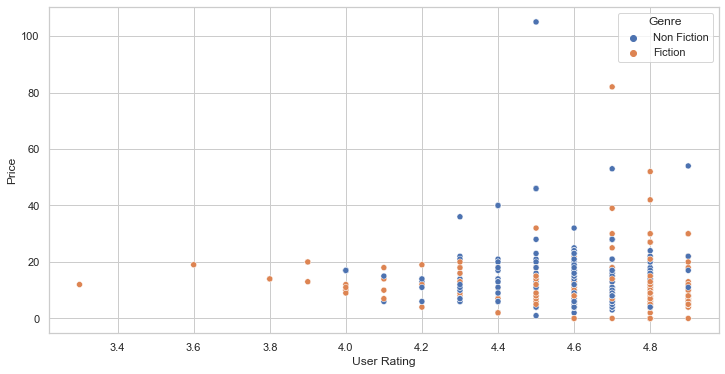

In [24]:
sns.scatterplot(data=df, x='User Rating', y='Price', hue='Genre');

It doesn't seem that there is any correlation between a book's price and its rating. Who would have thought?